## Score Analysis

In [245]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import numpy as np

In [246]:
ver = '1'

In [247]:
model_dict = pickle.load(open('model_perf.pkl_'+ver,'rb'))

In [248]:
model_df = pd.DataFrame(model_dict['models'])

In [249]:
model_df['model_type'].unique()

array(['Logistic Regression', 'Decision Tree Regressor', 'K Neighbors',
       'Random Forest', 'Support Vector Classifier'], dtype=object)

In [250]:
model_df.groupby(by='model_type').mean()

,C,no_of_features,AUC Score,Min Leaves,Number of Neighbors,no_of_trees,min_leaves
model_type,,,,,,,
Decision Tree Regressor,NaN,27.5,0.548973,63.75,NaN,NaN,NaN
K Neighbors,NaN,27.5,0.528623,NaN,10.0,NaN,NaN
Logistic Regression,22.2220,27.5,0.598370,NaN,NaN,NaN,NaN
Random Forest,NaN,27.5,0.567434,NaN,NaN,200.0,10.0
Support Vector Classifier,2.7775,27.5,0.541728,NaN,NaN,NaN,NaN


# Logistic Regression Model Analysis

In [251]:
log_reg = model_df[model_df['model_type'] == 'Logistic Regression']

Text(0.5, 1.0, 'Logistic Regression Curve with Hyperparameter C')

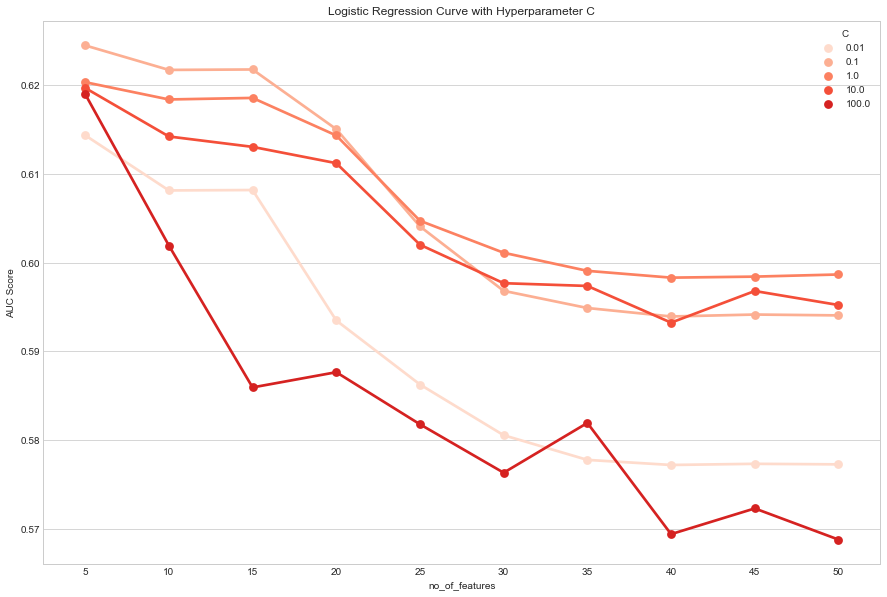

In [252]:
fig,axes = plt.subplots(figsize=(15,10))
sns.pointplot(x='no_of_features',y='AUC Score',hue='C',data=log_reg)
plt.title('Logistic Regression Curve with Hyperparameter C')

Notes : 
    Experiment with C value less than 0.01

# Decision Tree Classifier

In [253]:
dec_cls = model_df[model_df['model_type'] == 'Decision Tree Regressor']

Text(3.2, 0.565, 'Ideal No on\nFeatures = 20')

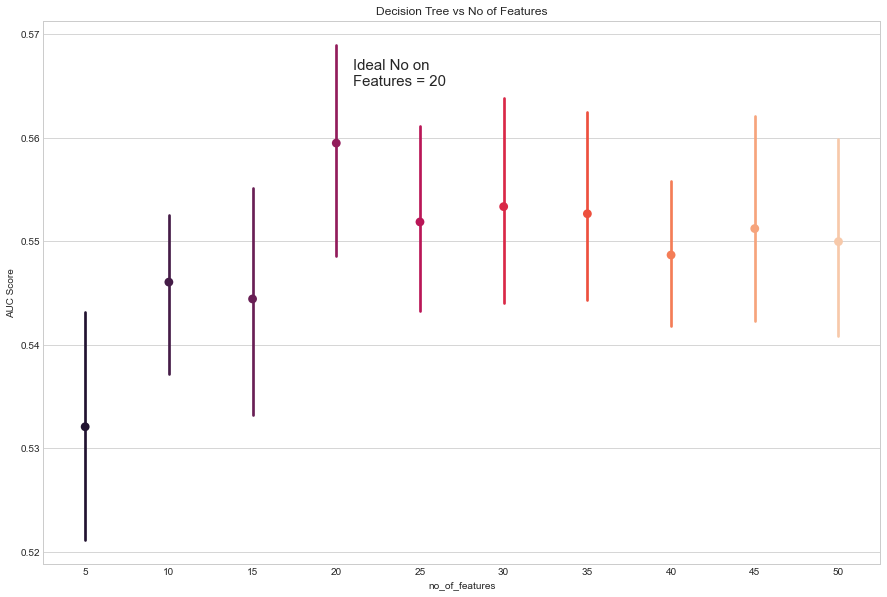

In [254]:
fig,axes = plt.subplots(figsize=(15,10))
sns.pointplot(x='no_of_features',y='AUC Score',data=dec_cls,palette='rocket')
plt.title('Decision Tree vs No of Features')
plt.text(3.2,0.565,'Ideal No on\nFeatures = 20',fontsize=15)

Text(0, 0.5, 'AUC Score')

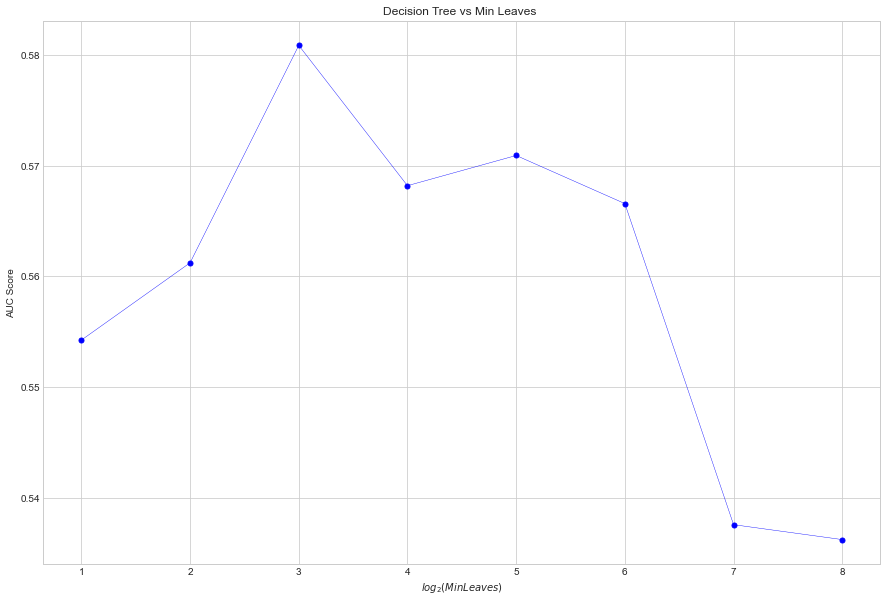

In [255]:
dec_cls_20 = dec_cls[dec_cls['no_of_features']==20]
fig,axes = plt.subplots(figsize=(15,10))
plt.plot(np.log2(dec_cls_20['Min Leaves']),dec_cls_20['AUC Score'],'bo-',linewidth=0.4,markersize=5)
plt.title('Decision Tree vs Min Leaves ')
plt.xlabel(r'$log_2(Min Leaves)$')
plt.ylabel('AUC Score')

# K Nearest Neighbors

In [256]:
knn = model_df[model_df['model_type'] == 'K Neighbors']

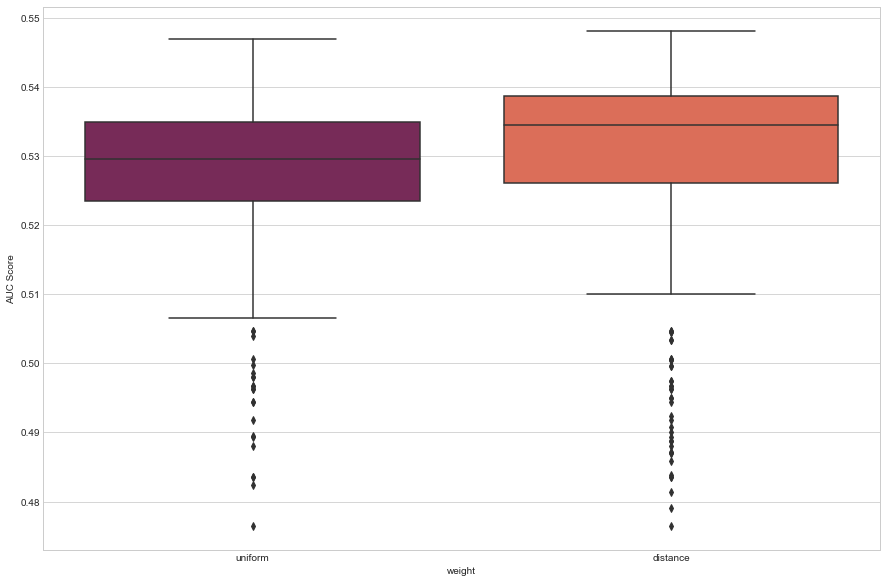

In [261]:
fig,axes = plt.subplots(figsize=(15,10))
sns.boxplot(data=knn,x='weight',y='AUC Score',palette='rocket')

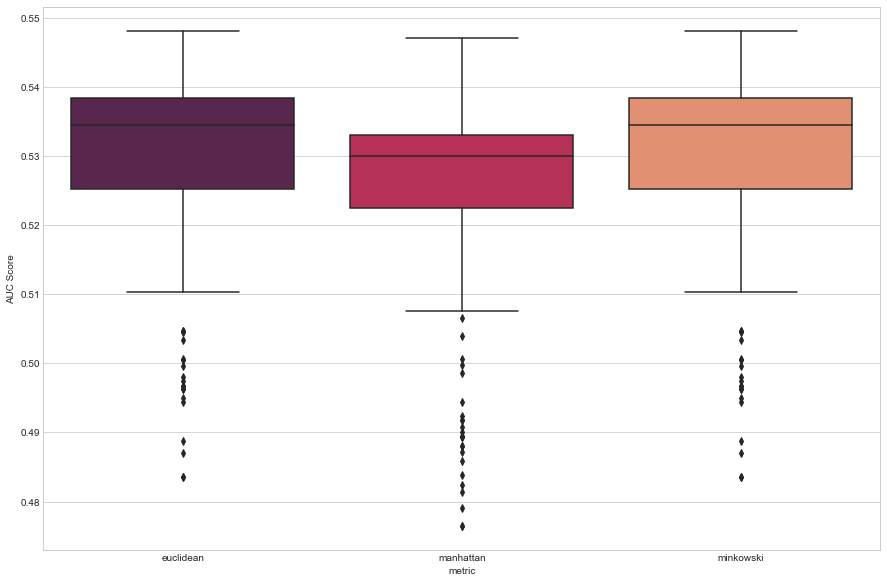

In [266]:
fig,axes = plt.subplots(figsize=(15,10))
sns.boxplot(data=knn,x='metric',y='AUC Score',palette='rocket')

Text(3.2, 0.565, 'Ideal No on\nFeatures = 20')

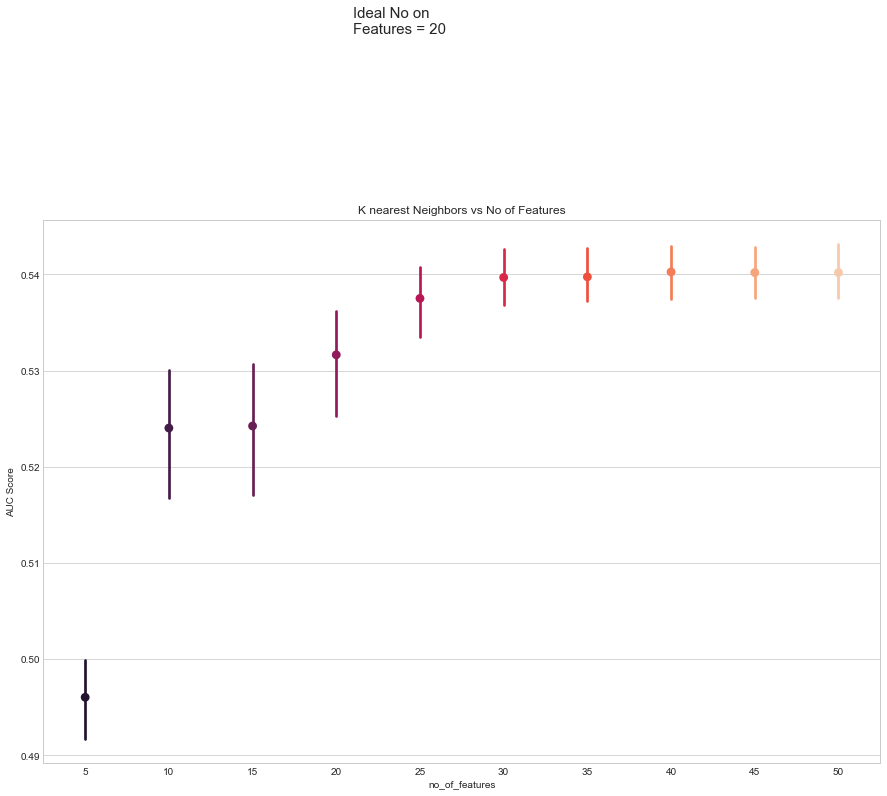

In [281]:
knn_opt = knn[(knn['metric']=='euclidean') & (knn['weight']=='distance')]
fig,axes = plt.subplots(figsize=(15,10))
sns.pointplot(x='no_of_features',y='AUC Score',data=knn_opt,palette='rocket')
plt.title('K nearest Neighbors vs No of Features')
plt.text(3.2,0.565,'Ideal No on\nFeatures = 20',fontsize=15)

In [283]:
knn_opt.groupby('no_of_features').mean().sort_values('AUC Score')

,C,AUC Score,Min Leaves,Number of Neighbors,no_of_trees,min_leaves
no_of_features,,,,,,
5,NaN,0.496047,NaN,10.0,NaN,NaN
10,NaN,0.524021,NaN,10.0,NaN,NaN
15,NaN,0.524236,NaN,10.0,NaN,NaN
20,NaN,0.531633,NaN,10.0,NaN,NaN
25,NaN,0.537494,NaN,10.0,NaN,NaN
30,NaN,0.539669,NaN,10.0,NaN,NaN
35,NaN,0.539729,NaN,10.0,NaN,NaN
45,NaN,0.540179,NaN,10.0,NaN,NaN
50,NaN,0.540179,NaN,10.0,NaN,NaN


Text(0, 0.5, 'AUC Score')

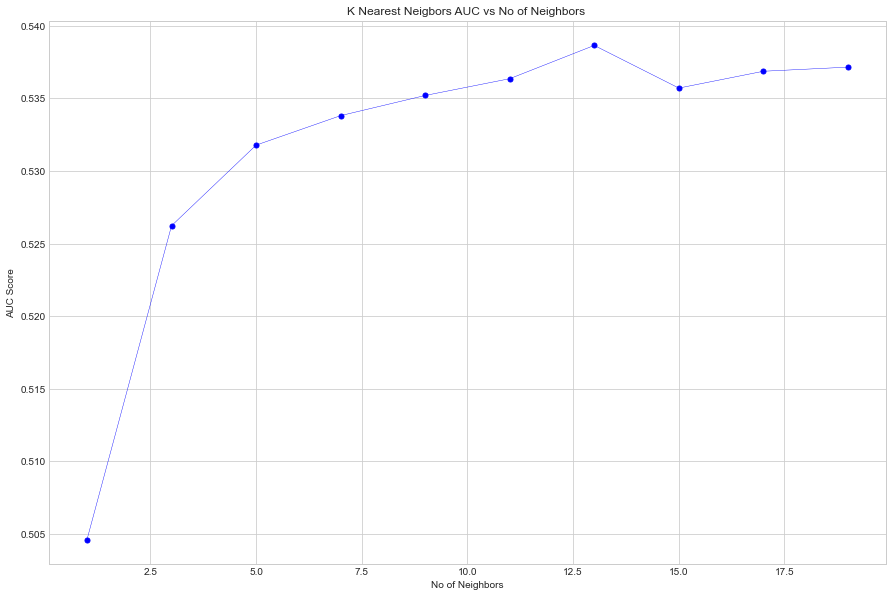

In [288]:
knn_opt_20 = knn_opt[knn_opt['no_of_features']==20]
fig,axes = plt.subplots(figsize=(15,10))
plt.plot(knn_opt_20['Number of Neighbors'],knn_opt_20['AUC Score'],'bo-',linewidth=0.4,markersize=5)
plt.title('K Nearest Neigbors AUC vs No of Neighbors ')
plt.xlabel(r'No of Neighbors')
plt.ylabel('AUC Score')